In [ ]:
# Load the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
# Load the data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the data into X and Y Arrays

In [14]:
# x represent the IMAGE data and Y represent LABELS

In [15]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype= 'float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [16]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

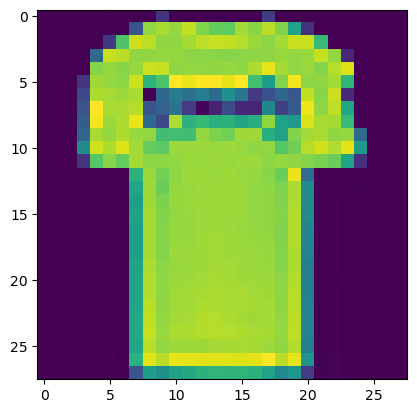

In [17]:
#View image from the split column
image = x_train[560, :].reshape((28, 28))

plt.imshow(image)
plt.show()



In [18]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Creat the Convoluton Neural Network

In [20]:
#define the Model

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}' .format(x_train.shape))
print('x_test shape: {}' .format(x_test.shape))
print('x_validate shape: {}' .format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


# Define the Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

cnn_model = Sequential([
    Input(shape=im_shape),  # Explicitly define input shape
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the Model

In [24]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Fit the Model

In [26]:
from tensorflow.keras.callbacks import TensorBoard

# Define TensorBoard callback
tensorboard = TensorBoard(
    log_dir="logs/cnn_1layer",
    histogram_freq=1,
    write_graph=True,
    write_images=True
)

cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.6290 - loss: 1.1361 - val_accuracy: 0.8381 - val_loss: 0.4757
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.8428 - loss: 0.4560 - val_accuracy: 0.8622 - val_loss: 0.4010
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8580 - loss: 0.4013 - val_accuracy: 0.8746 - val_loss: 0.3662
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8739 - loss: 0.3682 - val_accuracy: 0.8808 - val_loss: 0.3447
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8830 - loss: 0.3338 - val_accuracy: 0.8828 - val_loss: 0.3283
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.8850 - loss: 0.3247 - val_accuracy: 0.8920 - val_loss: 0.3122
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8961 - loss: 0.3061 - val_accuracy: 0.8879 - val_loss: 0.3181
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8951 - loss: 0.2962 - val_accuracy: 0.8928 - 

In [27]:
# Evaluate the  Model

score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}' .format(score[0]))
print('test acc: {:.4f}' .format(score[1]))

test loss: 0.2822
test acc: 0.9021


In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorboard.plugins import projector

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 


In [51]:
test_data = np.array(pd.read_csv('test.csv'), dtype='float32')

embed_count = 1600
x_test = test_data[:embed_count, 1:] / 255
y_test = test_data[:embed_count, 0]

logdir = r'C:\Users\Elisha\TEST\logdir'

In [59]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [73]:
summary_writer = tf.summary.create_file_writer(logdir)

embedding_var = tf.Variable(x_test, name='fmnist_embedding')


config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

projector.visualize_embeddings(logdir, config)

In [99]:
import tensorflow as tf

In [105]:
tf.Variable(x_test)
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver-save(sesh, os.path.join(logdir, 'model.ckpt'))

IndentationError: unexpected indent (534330779.py, line 2)

In [103]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [107]:
tf.Variable(x_test)
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()

IndentationError: unexpected indent (1958834472.py, line 2)

In [109]:
import tensorflow as tf

# Ensure eager execution is enabled (default in TensorFlow 2.x)
print("Eager execution:", tf.executing_eagerly())

# Define an embedding variable (No need for tf.Session())
embedding_var = tf.Variable(x_test, name="fmnist_embedding")

# Variables are initialized automatically in TF 2.x (No need for global_variables_initializer())
print("Variable initialized:", embedding_var)

# Saving model checkpoint (Alternative to tf.train.Saver())
checkpoint = tf.train.Checkpoint(variable=embedding_var)
checkpoint.write("embedding_checkpoint.ckpt")

print("Checkpoint saved successfully.")

Eager execution: True
Variable initialized: <tf.Variable 'fmnist_embedding:0' shape=(1600, 784) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>
Checkpoint saved successfully.


In [159]:
import numpy as np

labels = []  # ✅ Define labels list

# Example label names (for Fashion-MNIST dataset)
label = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]  # Adjust for your dataset

sprite_dim = int(np.sqrt(len(x_test)))  # Ensure x_test is correctly sized
sprite_image = np.ones((sprite_dim * 28, sprite_dim * 28))

for i in range(sprite_dim):
    for j in range(sprite_dim):
        index = i * sprite_dim + j  
        if index < len(y_test):
            labels.append(label[int(y_test[index])])

            sprite_image[
                i * 28: (i + 1) * 28,
                j * 28: (j + 1) * 28
            ] = x_test[index].reshape(28, 28) * -1 + 1  # Ensure correct image transformation

# Save metadata file
with open("metadata.tsv", 'w') as meta:
    for label_name in labels:
        meta.write(f"{label_name}\n")

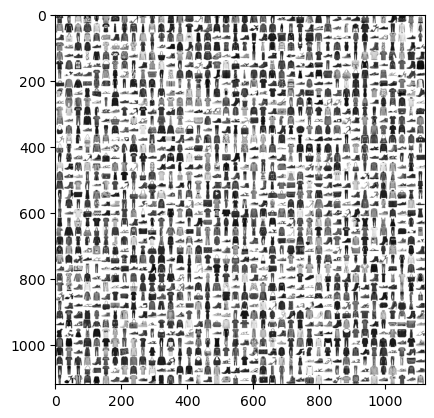

In [163]:
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()